In [7]:
!pip install datasets huggingface_hub transformers

  Cloning https://github.com/huggingface/transformers to c:\users\osi0pr\appdata\local\temp\pip-req-build-02ybb9io
  Resolved https://github.com/huggingface/transformers to commit 9fd606dbdb392e76e66a4e4e852948ebf814dbb6
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for transformers: filename=transformers-4.41.0.dev0-py3-none-any.whl size=9091941 sha256=3190c4d3067cae58d1f27499c162f3f87ae9379189378a0066a0b07f3435b9af
  Stored in directory: C:\Users\osi0pr\AppData\Local\Temp\pip-ephem-wheel-cache-9irog56o\wheels\04\a3\f1\b88775f8e1665827525b19ac7590250f1038d947067beba9fb
Successfully buil

  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers 'C:\Users\osi0pr\AppData\Local\Temp\pip-req-build-02ybb9io'
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\osi0pr\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\transformers\\models\\deprecated\\trajectory_transformer\\convert_trajectory_transformer_original_pytorch_checkpoint_to_pytorch.py'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths



Download the metadata for datasets

In [17]:
from datasets import load_dataset

financial_tweets_other = load_dataset("StephanAkkerman/financial-tweets-other")
financial_tweets_stocks = load_dataset("StephanAkkerman/financial-tweets-stocks")
financial_tweets_crypto = load_dataset("StephanAkkerman/financial-tweets-crypto")
cryptonews = load_dataset("SahandNZ/cryptonews-articles-with-price-momentum-labels")

#load the datasets




Create the csv for our datasets

Start with cryptonews

In [22]:
from datasets import load_from_disk

cryptonews.cache_files
cryptonews.save_to_disk("data/cryptonews")

cryptonews_ds = load_from_disk("data/cryptonews")
cryptonews_ds

for split, dataset in cryptonews.items():
    dataset.to_csv(f"data/cryptonews/cryptonews-{split}.csv", index=None)

Creating CSV from Arrow format: 100%|██████████| 19/19 [00:00<00:00, 119.95ba/s]


Continue with financial news

In [24]:

#Other dataset loading

financial_tweets_other.cache_files
financial_tweets_other.save_to_disk("data/finance_other")

financial_tweets_other_ds = load_from_disk("data/finance_other")
financial_tweets_other

for split, dataset in financial_tweets_other.items():
    dataset.to_csv(f"data/finance_other/finance_other-{split}.csv", index=None)

#Stocks dataset loading

financial_tweets_stocks.cache_files
financial_tweets_stocks.save_to_disk("data/finance_stocks")

financial_tweets_stocks_ds = load_from_disk("data/finance_stocks")
financial_tweets_stocks_ds

for split, dataset in financial_tweets_stocks.items():
    dataset.to_csv(f"data/finance_stocks/finance_stocks-{split}.csv", index=None)

#Crypto dataset loading

financial_tweets_crypto.cache_files
financial_tweets_crypto.save_to_disk("data/finance_crypto")

financial_tweets_crypto_ds = load_from_disk("data/finance_crypto")
financial_tweets_crypto_ds

for split, dataset in financial_tweets_crypto.items():
    dataset.to_csv(f"data/finance_crypto/finance_crypto-{split}.csv", index=None)

Creating CSV from Arrow format: 100%|██████████| 48/48 [00:00<00:00, 93.10ba/s]


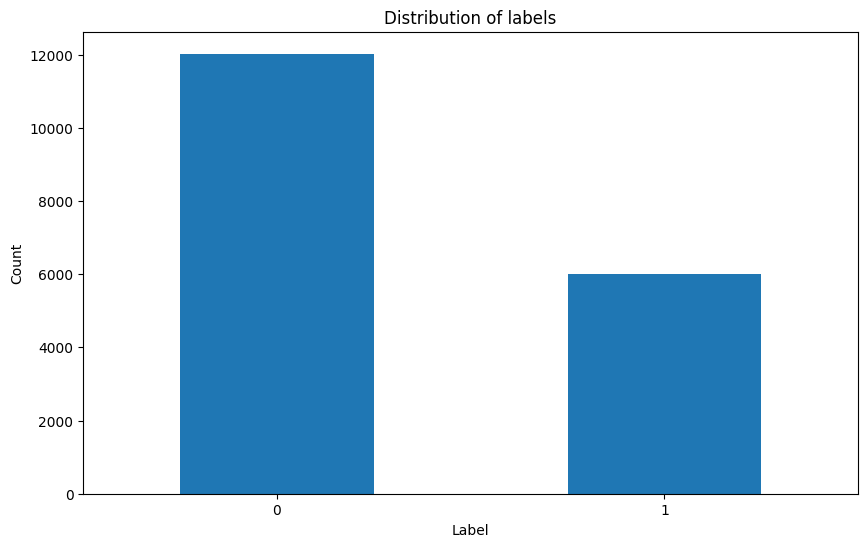

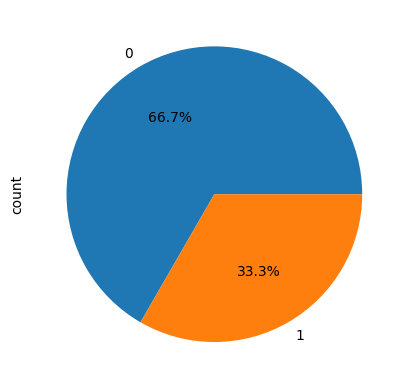

In [26]:
import pandas as pd

df = pd.read_csv('data/cryptonews/cryptonews-test.csv')

df.head()

#conduct data visualization

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['label'].value_counts().plot(kind='bar')
plt.title('Distribution of labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

df['label'].value_counts()

df['label'].value_counts(normalize=True)

df['label'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()